In [1]:
from utils_v1 import *


In [2]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerEnsemble
from src.backend.Logger import Logger


In [3]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [4]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [5]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod,
	"classes_mode": False
}
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''


# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
# site = 'MT'
site = 'PA'

if site == 'PA':
	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
		addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
	# dataset.prodes_dates = [2018, 2019, 2020]

elif site == 'MT':
	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
	# dataset.prodes_dates = [2019, 2020, 2021]


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:

	if type(dataset) == PAMultipleDates:
		exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122] # same date
		# exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121] # earlier date

	if type(dataset) == MTMultipleDates:
		# exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117] # same date
		exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123] # earlier date

else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	exp = 140

logger = Logger()
trainer = TrainerEnsemble(config, dataset, patchesHandler, logger)

trainer.defineExperiment(exp_ids)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy', 'classes_mode': False}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp_ids

[103, 104, 105, 106, 107, 118, 119, 120, 121, 122]

In [7]:
trainer.classes_mode

False

In [8]:
# trainer.setExperimentPath()
# trainer.createLogFolders()

In [9]:
# ic(type(dataset), exp, dataset.dates)


In [10]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [11]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [12]:

trainer.label_mask.dtype

dtype('uint8')

In [13]:
unique, count = np.unique(trainer.label_mask, return_counts=True)
print(unique, count)

total = np.sum(count)
percentage_count = [round(x*100, 1) for x in count / total]
print(percentage_count)

[0 1 2] [100903598   1838508  60373894]
[61.9, 1.1, 37.0]


In [14]:
# pdb.set_trace()

In [15]:

trainer.getLabelCurrentDeforestation()

In [16]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [17]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

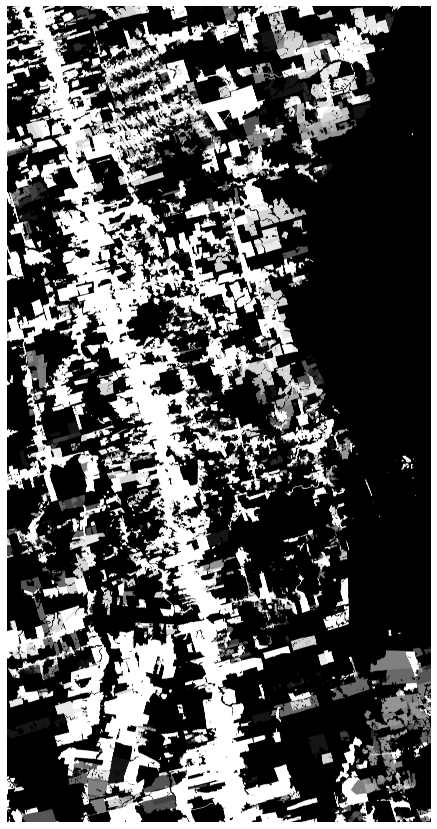

In [18]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [19]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [20]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [21]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [22]:
if config["training"] == True:
    trainer.extractCoords()

In [23]:
if config["training"] == True:
    trainer.trainTestSplit()

In [24]:
if config["training"] == True:
    trainer.label_mask.shape

In [25]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [26]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [27]:
if config["training"] == True:
    print(trainer.coords_train)

In [28]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [29]:
if config["training"] == True:
    inputSnipShow = True

In [30]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [31]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [32]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [33]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [34]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [35]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [36]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [37]:
if config["training"] == True:
    trainer.getGenerators()


In [38]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [39]:
if config["training"] == True:
    print(trainer.path_exp)

In [40]:
if config["training"] == True:
    print(trainer.channels)

In [41]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [42]:
if config["training"] == True:
    trainer.train()

In [43]:
if config["training"] == True:
    trainer.plotHistory()


In [44]:
trainer.image_stack.shape

(17730, 9200, 21)

In [45]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [46]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [47]:
trainer.image_stack.shape

(17730, 9200, 21)

In [48]:
trainer.setPadding()

-30.0 -16.0


In [49]:
trainer.infer()

time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [50]:
trainer.loadPredictedProbabilities()

In [51]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [52]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [53]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [54]:
trainer.getMeanProb()


In [55]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 1.500655e-16
    np.mean(value): 0.014949512
    np.max(value): 0.9961816


In [56]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [57]:
trainer.unpadMeanProb()

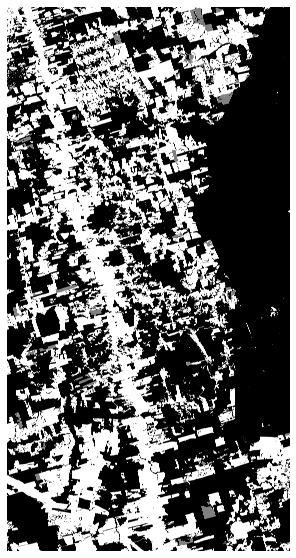

In [58]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [59]:
trainer.squeezeLabel()

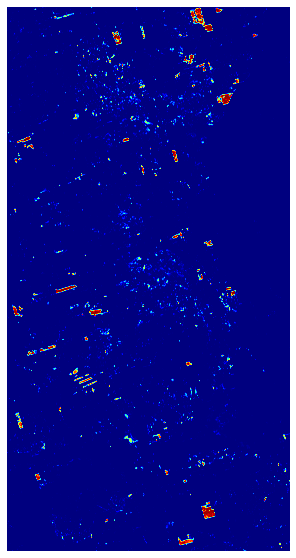

In [60]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [61]:
print(trainer.label_mask.shape)

(17730, 9200)


In [62]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [63]:
# trainer.getMAP()

In [64]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [65]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 17760, 9216, 1)


In [66]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

In [67]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 0.0
    np.mean(value): 0.014945002
    np.max(value): 0.9999957


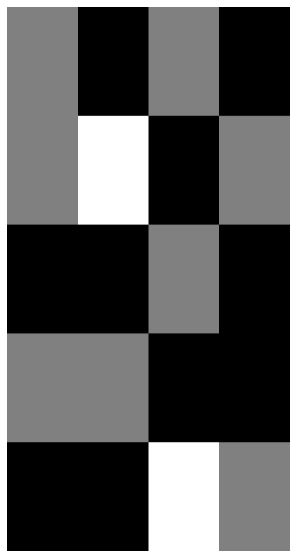

In [68]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [69]:
trainer.getLabelCurrentDeforestation()

In [70]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161192339,   1923661], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [71]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [72]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161192339,   1923661], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161368428,   1747572], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162939911,    176089], dtype=int64))


In [73]:
trainer.calculateMetrics()

ic| self.f1: 85.77, self.precision: 88.45, self.recall: 83.24


In [74]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9431485,)
ic| f1_val: 87.05
    precision_val: 84.03
    recall_val: 90.3
    mAP_val: 92.71


In [75]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [76]:
trainer.get_label_no_buffer()


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


In [77]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162560284,    555716], dtype=int64))


In [78]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


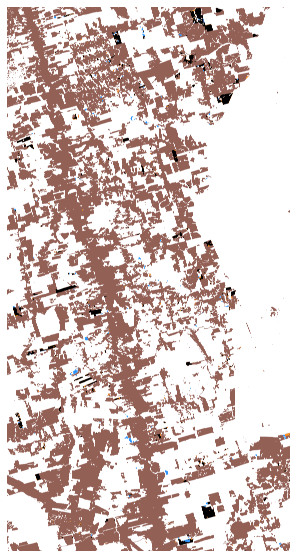

In [79]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [80]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [81]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

In [82]:
trainer.setUncertainty()

In [83]:
trainer.uncertainty_map.shape

(17760, 9216)

In [84]:
trainer.logger.getStats(trainer.uncertainty_map)

ic| np.min(value): 5.1620966e-15
    np.mean(value): 0.010492702
    np.max(value): 0.36787948


In [85]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.009231566
    np.max(value): 0.36787948


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

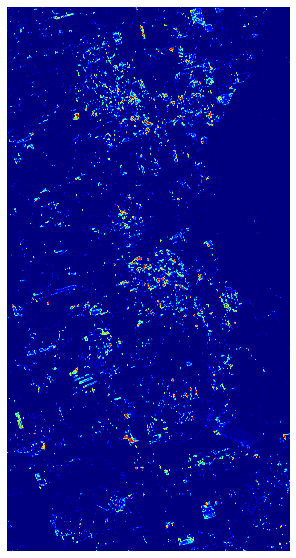

In [86]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



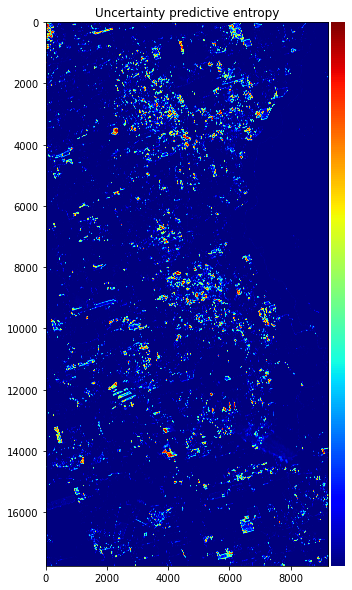

In [87]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [88]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54147114,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


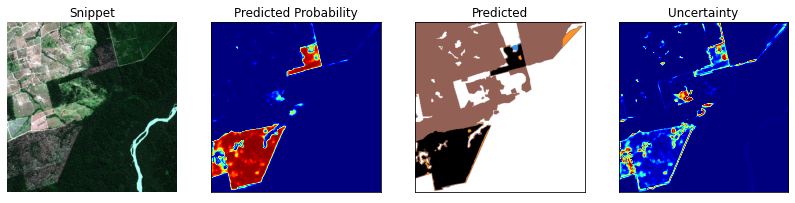

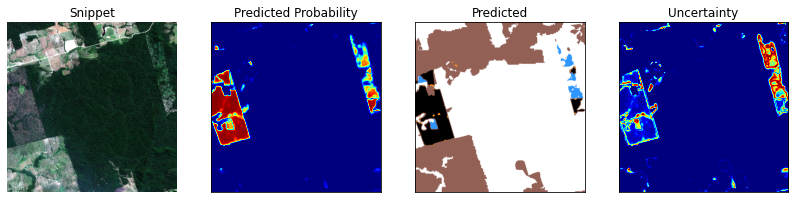

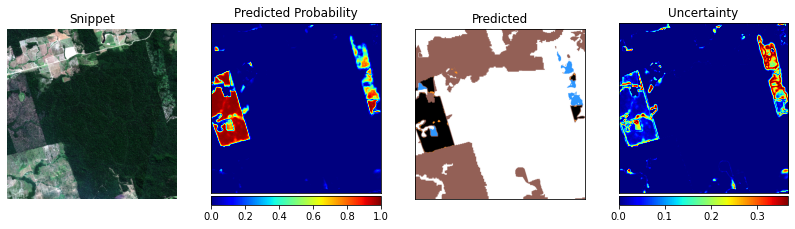

In [89]:
trainer.logger.plotCropSample(trainer)

In [90]:

label_tmp_dates = []
for date in dataset.prodes_dates:
    label_tmp_date = dataset.loadLabelFromDate(date)
    label_tmp_date = label_tmp_date[:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1]]
    label_tmp_dates.append(label_tmp_date)

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2018) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


In [91]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([104050616,   2209014,  56856370], dtype=int64))

In [92]:
label_tmp_dates[0].shape

(17730, 9200)

In [93]:
# del trainer.image_stack
import src.lansdatLoader as ll
import importlib
importlib.reload(ll)
landsatLoader = ll.LandsatLoader(dataset)
ims = landsatLoader.load()
for idx in range(len(ims)):
    ims[idx] = ims[idx][:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1],:]
ims = landsatLoader.darken_past_deforestation(ims, trainer.label_no_buffer)
ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2018.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2018.tif
Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2019.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2019.tif
Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2020.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2020.tif


In [94]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1], dtype=uint8), array([160906986,   2209014], dtype=int64))

In [95]:
ims[0].shape

(17730, 9200, 3)

In [96]:
trainer.classes_mode

False

In [97]:
'''
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_figheight(20)
fig.set_figwidth(20)
lims = trainer.dataset.previewLims1
axes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)
'''

'\nfig, axes = plt.subplots(2, 3)\naxes = axes.flatten()\nfig.set_figheight(20)\nfig.set_figwidth(20)\nlims = trainer.dataset.previewLims1\naxes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)\n'

In [98]:
# trainer.dataset.previewLims2 = np.array([5000, 6000, 9500, 10500])

In [99]:
import src.backend.Logger as lg 
importlib.reload(lg)
logger = lg.Logger()


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))


[(17730, 9200, 3), (17730, 9200, 3), (17730, 9200, 3), (17730, 9200), (17730, 9200, 3), (17730, 9200)]
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)


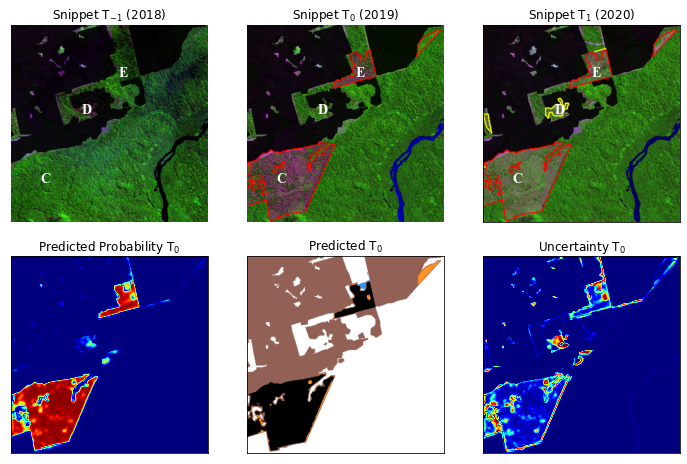

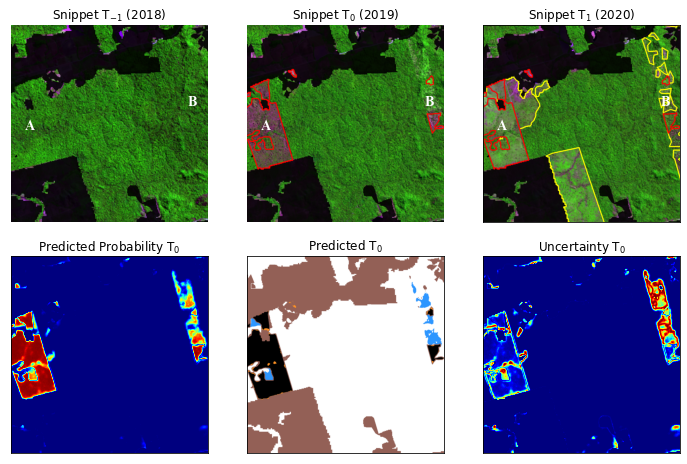

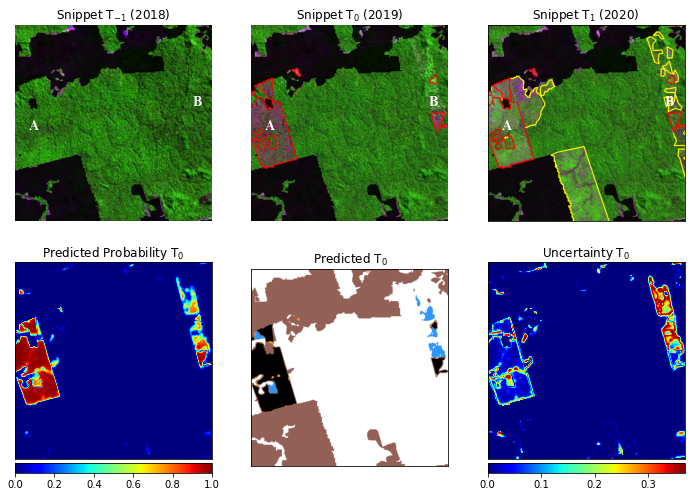

In [100]:
logger.plotCropSampleLandsat(trainer, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


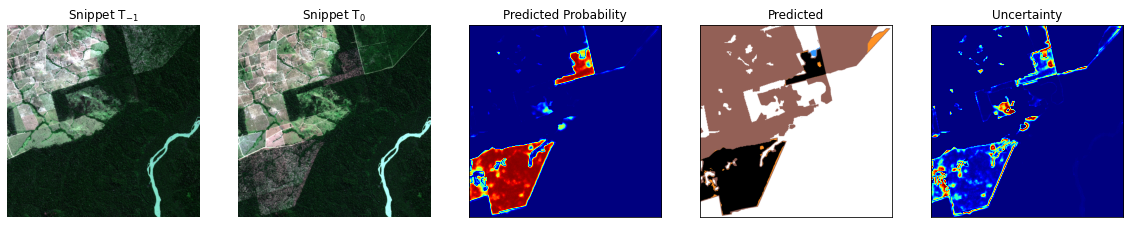

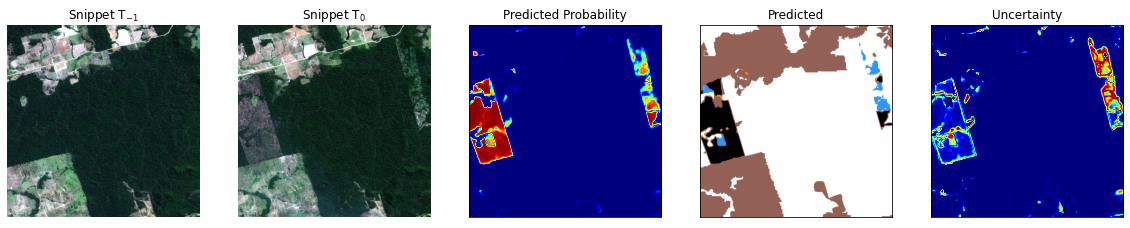

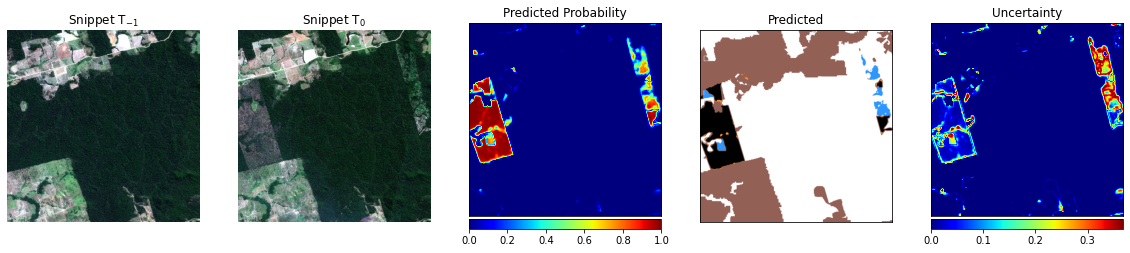

In [101]:
logger.plotCropSampleT0T1(trainer)

In [102]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [103]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [104]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 1.15577e-09
    np.mean(value): 0.012612292
    np.max(value): 0.36787948


In [105]:
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  

(54147114,) (54147114,)
0.8244831376320643
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...
0.008866092051500251
0.8244831376320643
0.008866092051500251


In [106]:
trainer.uncertainty.shape

(54147114,)

In [107]:
np.mean(trainer.mean_prob)

0.01406089

In [108]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

(17730, 9200)
[[550, 550], [210, 610], [207, 617], [800, 200]]


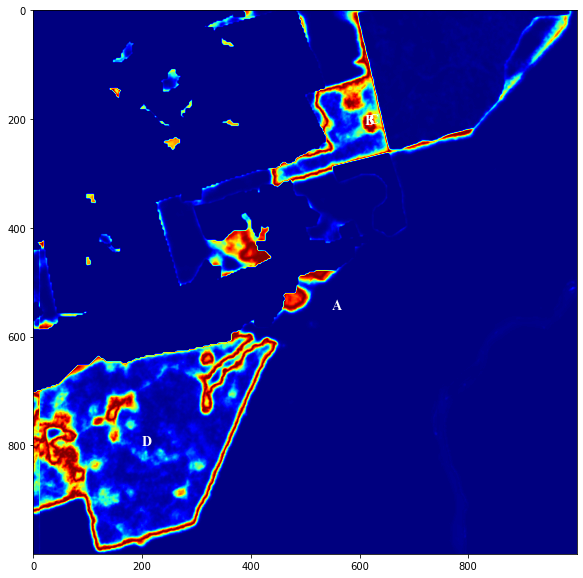

In [124]:
print(trainer.mean_prob.shape)

lims = dataset.previewLims1
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='jet')
font = {'family': "Times New Roman",
        'color':  'white',
        'weight': 'bold',
        'size': 14,
        }

letters = ['A', 'B', 'C', 'D', 'E', 'F']
print(trainer.dataset.snippet_coords['snippet_id0'])
for poi_id in range(4):
        
        plt.text(trainer.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                 trainer.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                 letters[poi_id], fontdict=font)


(17730, 9200)


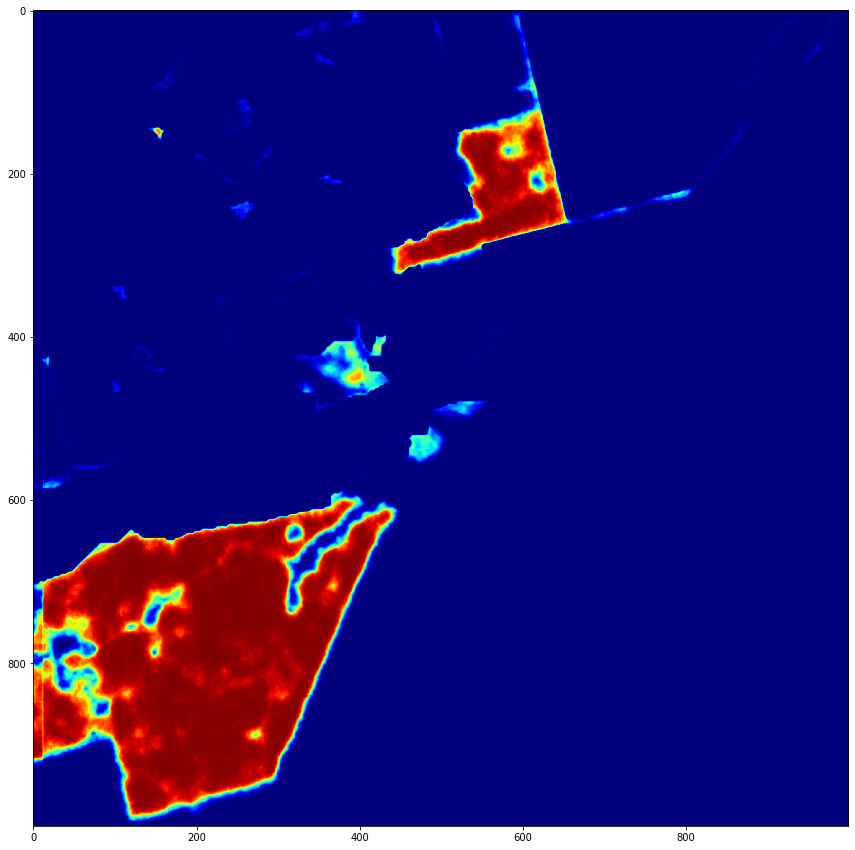

In [110]:
print(trainer.mean_prob.shape)

lims = dataset.previewLims1
im = trainer.prob_rec[3][lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(15,15))
plt.imshow(im, cmap='jet')


In [111]:
def getPOIValues(self):
    self.snippet_poi_results = []

    lims_snippets = [self.dataset.previewLims1, self.dataset.previewLims2]
    for snippet_id, lims in enumerate(lims_snippets):
        for coord in self.dataset.snippet_coords["snippet_id{}".format(snippet_id)]:
            dict_ = {"snippet_id": snippet_id,
                    "coords": coord, # 10,1 alpha
                    "reference": self.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}
            
            predicted_coord = []
            for idx in range(self.prob_rec.shape[0]):
                predicted_coord.append(self.prob_rec[idx][lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]])
            predicted_coord = np.array(predicted_coord)
            dict_["predicted"] = predicted_coord

            self.snippet_poi_results.append(dict_)

    return self.snippet_poi_results

In [112]:

import types

trainer.getPOIValues = types.MethodType(getPOIValues, trainer)



In [113]:
trainer.getPOIValues()


[{'snippet_id': 0,
  'coords': [550, 550],
  'reference': 0,
  'predicted': array([[2.48296004e-07],
         [4.16432844e-09],
         [1.68376213e-09],
         [2.36679583e-07],
         [3.45382723e-05],
         [3.84681698e-06],
         [1.00834685e-13],
         [1.32610875e-11],
         [1.66440691e-06],
         [8.39343954e-08]], dtype=float32)},
 {'snippet_id': 0,
  'coords': [210, 610],
  'reference': 1,
  'predicted': array([[0.4554153 ],
         [0.4598863 ],
         [0.30445483],
         [0.5327956 ],
         [0.46919134],
         [0.5441637 ],
         [0.150321  ],
         [0.36867702],
         [0.59043163],
         [0.4161476 ]], dtype=float32)},
 {'snippet_id': 0,
  'coords': [207, 617],
  'reference': 1,
  'predicted': array([[0.16695404],
         [0.27290606],
         [0.06870116],
         [0.17027362],
         [0.29472125],
         [0.2686468 ],
         [0.08341189],
         [0.23350567],
         [0.33091488],
         [0.13750772]], dtype=float

In [114]:
import pickle
with open('log_ensemble_.pkl', 'wb') as f:
            pickle.dump(trainer.snippet_poi_results, f)


Get precision-recall threshold

In [115]:

trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54147114,)
    self.label_mask_current_deforestation_test.shape: (54147114,)


[0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0025


ic| label_current_deforestation_test_classified_incorrect.shape: (8431827,)
    predicted_test_classified_incorrect.shape: (8431827,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 8431827
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 8431827
    len(label_mask_current_deforestation_test): 54147114


[       nan 0.         0.         0.15572071 0.884497   0.83846302
 0.02341669]
threshold 0.005


ic| label_current_deforestation_test_classified_incorrect.shape: (6970170,)
    predicted_test_classified_incorrect.shape: (6970170,)
ic| TP_H + FN_H + FP_H + TN_H: 6970170
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 6970170
    len(label_mask_current_deforestation_test): 54147114


[1.00000000e+00 3.18840580e-02 2.84650010e-04 1.28726528e-01
 8.84462053e-01 8.39650671e-01 2.81656345e-02]
threshold 0.0075


ic| label_current_deforestation_test_classified_incorrect.shape: (6107878,)
    predicted_test_classified_incorrect.shape: (6107878,)
ic| TP_H + FN_H + FP_H + TN_H: 6107878
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 6107878
    len(label_mask_current_deforestation_test): 54147114


[1.         0.44278842 0.00764742 0.11280154 0.88355077 0.83928715
 0.03201632]
threshold 0.01


ic| label_current_deforestation_test_classified_incorrect.shape: (5580527,)
    predicted_test_classified_incorrect.shape: (5580527,)
ic| TP_H + FN_H + FP_H + TN_H: 5580527
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 5580527
    len(label_mask_current_deforestation_test): 54147114


[1.         0.74596098 0.03031046 0.10306232 0.88065332 0.83610188
 0.03494297]
threshold 0.015


ic| label_current_deforestation_test_classified_incorrect.shape: (4901145,)
    predicted_test_classified_incorrect.shape: (4901145,)
ic| TP_H + FN_H + FP_H + TN_H: 4901145
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 4901145
    len(label_mask_current_deforestation_test): 54147114


[1.         0.89103837 0.09472444 0.09051535 0.87157084 0.82546862
 0.03958307]
threshold 0.025


ic| label_current_deforestation_test_classified_incorrect.shape: (4133082,)
    predicted_test_classified_incorrect.shape: (4133082,)
ic| TP_H + FN_H + FP_H + TN_H: 4133082
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 4133082
    len(label_mask_current_deforestation_test): 54147114


[1.         0.93949928 0.20760383 0.07633061 0.85180777 0.80207137
 0.04659251]
threshold 0.05


ic| label_current_deforestation_test_classified_incorrect.shape: (3185919,)
    predicted_test_classified_incorrect.shape: (3185919,)
ic| TP_H + FN_H + FP_H + TN_H: 3185919
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 3185919
    len(label_mask_current_deforestation_test): 54147114


[0.99931542 0.95680022 0.36581204 0.05883821 0.81141044 0.75546177
 0.05957451]
threshold 0.08


ic| label_current_deforestation_test_classified_incorrect.shape: (2565849,)
    predicted_test_classified_incorrect.shape: (2565849,)
ic| TP_H + FN_H + FP_H + TN_H: 2565849
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 2565849
    len(label_mask_current_deforestation_test): 54147114


[0.99691603 0.95978126 0.47592528 0.04738663 0.76876878 0.70718437
 0.07248294]
threshold 0.1


ic| label_current_deforestation_test_classified_incorrect.shape: (2274116,)
    predicted_test_classified_incorrect.shape: (2274116,)
ic| TP_H + FN_H + FP_H + TN_H: 2274116
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 2274116
    len(label_mask_current_deforestation_test): 54147114


[0.99414072 0.95971203 0.52779423 0.04199884 0.74260322 0.67691456
 0.0803832 ]
threshold 0.15


ic| label_current_deforestation_test_classified_incorrect.shape: (1741802,)
    predicted_test_classified_incorrect.shape: (1741802,)
ic| TP_H + FN_H + FP_H + TN_H: 1741802
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1741802
    len(label_mask_current_deforestation_test): 54147114


[0.98557185 0.95664066 0.61877056 0.03216796 0.68196064 0.60497841
 0.09926316]
threshold 0.2


ic| label_current_deforestation_test_classified_incorrect.shape: (1348053,)
    predicted_test_classified_incorrect.shape: (1348053,)
ic| TP_H + FN_H + FP_H + TN_H: 1348053
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1348053
    len(label_mask_current_deforestation_test): 54147114


[0.97100974 0.95145874 0.68490878 0.02489612 0.62569387 0.52661465
 0.11677923]
threshold 0.225


ic| label_current_deforestation_test_classified_incorrect.shape: (1179375,)
    predicted_test_classified_incorrect.shape: (1179375,)
ic| TP_H + FN_H + FP_H + TN_H: 1179375
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1179375
    len(label_mask_current_deforestation_test): 54147114


[0.96127965 0.94815387 0.71327164 0.02178094 0.59840511 0.48104613
 0.12457174]
threshold 0.25


ic| label_current_deforestation_test_classified_incorrect.shape: (1019849,)
    predicted_test_classified_incorrect.shape: (1019849,)
ic| TP_H + FN_H + FP_H + TN_H: 1019849
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1019849
    len(label_mask_current_deforestation_test): 54147114


[0.9494838  0.94463078 0.73952754 0.01883478 0.57257124 0.42791728
 0.13153119]
threshold 0.27


ic| label_current_deforestation_test_classified_incorrect.shape: (896159,)
    predicted_test_classified_incorrect.shape: (896159,)
ic| TP_H + FN_H + FP_H + TN_H: 896159
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 896159
    len(label_mask_current_deforestation_test): 54147114


[0.93931937 0.94127086 0.75898044 0.01655045 0.55176929 0.3793101
 0.13659121]
threshold 0.3


ic| label_current_deforestation_test_classified_incorrect.shape: (713836,)
    predicted_test_classified_incorrect.shape: (713836,)
ic| TP_H + FN_H + FP_H + TN_H: 713836
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 713836
    len(label_mask_current_deforestation_test): 54147114


[0.92240636 0.93390104 0.78715125 0.01318327 0.51594284 0.28820802
 0.14105756]
threshold 0.34


ic| label_current_deforestation_test_classified_incorrect.shape: (452896,)
    predicted_test_classified_incorrect.shape: (452896,)
ic| TP_H + FN_H + FP_H + TN_H: 452896
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 452896
    len(label_mask_current_deforestation_test): 54147114


[0.89106187 0.91880521 0.82570022 0.00836418 0.46486283 0.06650359
 0.1294373 ]
threshold 0.36


ic| label_current_deforestation_test_classified_incorrect.shape: (244224,)
    predicted_test_classified_incorrect.shape: (244224,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 244224
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 244224
    len(label_mask_current_deforestation_test): 54147114


[0.884497   0.88033243 0.83243921 0.00451038        nan 0.
 0.09811531]
threshold 0.3648794801235199


ic| label_current_deforestation_test_classified_incorrect.shape: (150768,)
    predicted_test_classified_incorrect.shape: (150768,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 150768
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 150768
    len(label_mask_current_deforestation_test): 54147114


[0.884497   0.86172131 0.83243921 0.00278441        nan 0.
 0.07591386]
threshold 0.3663794801235199


ic| label_current_deforestation_test_classified_incorrect.shape: (106739,)
    predicted_test_classified_incorrect.shape: (106739,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 106739
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 106739
    len(label_mask_current_deforestation_test): 54147114


[0.884497   0.85310469 0.83243921 0.00197128        nan 0.
 0.06095333]


In [116]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54147114,)
    self.label_mask_current_deforestation_test.shape: (54147114,)


threshold 0.0025
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    5275   728960]]
[1.         0.99281565]
threshold 0.005
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    6346   727889]]
[1.         0.99135699]
threshold 0.0075
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    7066   727169]]
[1.         0.99037638]
threshold 0.01
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    7579   726656]]
[1.         0.98967769]
threshold 0.015
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    8505   725730]]
[1.         0.98841652]
threshold 0.025
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    9816   724419]]
[1.         0.98663098]
threshold 0.05
(54147114,) (54147114,)
cm_audited [[53412695      184]
 [   12127   722108]]
[0.99974526 0.98348349]
threshold 0.08
(54147114,) (54147114,)
cm_audited [[53411798     1081]
 [   14643   719592]]
[0.99850001 0.98005679]
threshold 0.1
(54147114,) (54147114,)
cm_audited [[534105

ic| metric_values_audited: array([[1.        , 0.99281565],
                                  [1.        , 0.99135699],
                                  [1.        , 0.99037638],
                                  [1.        , 0.98967769],
                                  [1.        , 0.98841652],
                                  [1.        , 0.98663098],
                                  [0.99974526, 0.98348349],
                                  [0.99850001, 0.98005679],
                                  [0.99682888, 0.97784361],
                                  [0.99076627, 0.97195448],
                                  [0.97925077, 0.96505751],
                                  [0.97097124, 0.9609975 ],
                                  [0.96049621, 0.95665284],
                                  [0.95105138, 0.95264459],
                                  [0.93447241, 0.94428759],
                                  [0.90180039, 0.9270329 ],
                                  [0.890

cm_audited [[53333064    79815]
 [  105243   628992]]
[0.8873953  0.85666306]


In [117]:
trainer.setPlotLimsForUncertaintyAA()

In [118]:
'''
import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
'''


'\nimport types\n\ntrainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)\n'

In [119]:
trainer.xlim


[-0.1, 10.4]

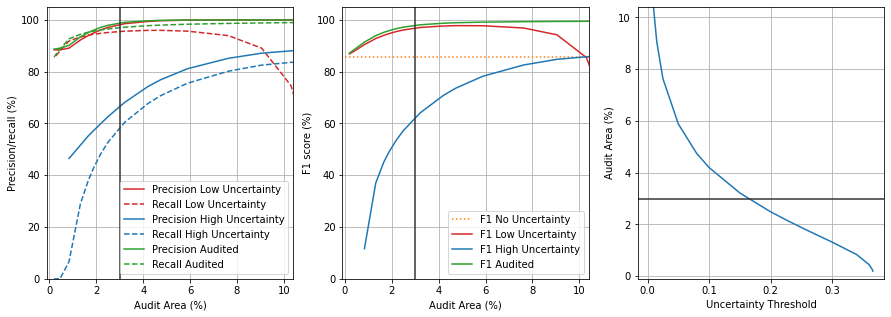

In [120]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA()

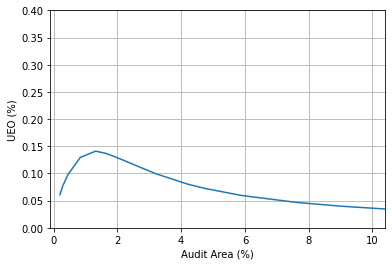

In [121]:
trainer.plotUEO()

In [122]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 0.3663794801235199)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.1408715596097929
threshold 0.1408715596097929


ic| label_current_deforestation_test_classified_incorrect.shape: (1825119,)
    predicted_test_classified_incorrect.shape: (1825119,)
ic| TP_H + FN_H + FP_H + TN_H: 1825119
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1825119
    len(label_mask_current_deforestation_test): 54147114


[0.98731377 0.95738401 0.60481045 0.03370667 0.69280225 0.61810684
 0.09584555]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (1166304,)
    predicted_test_classified_incorrect.shape: (1166304,)
ic| TP_H + FN_H + FP_H + TN_H: 1166304
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1166304
    len(label_mask_current_deforestation_test): 54147114


[0.96030646 0.94788554 0.7154426  0.02153954 0.5965279  0.47710371
 0.1251132 ]
0.08763636090393405
threshold 0.08763636090393405


ic| label_current_deforestation_test_classified_incorrect.shape: (2446596,)
    predicted_test_classified_incorrect.shape: (2446596,)
ic| TP_H + FN_H + FP_H + TN_H: 2446596
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 2446596
    len(label_mask_current_deforestation_test): 54147114


[0.99599921 0.95991957 0.49740342 0.04518424 0.75844091 0.69534309
 0.07556006]
0.16973724921531744
threshold 0.16973724921531744


ic| label_current_deforestation_test_classified_incorrect.shape: (1574523,)
    predicted_test_classified_incorrect.shape: (1574523,)
ic| TP_H + FN_H + FP_H + TN_H: 1574523
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1574523
    len(label_mask_current_deforestation_test): 54147114


[0.98007973 0.95495883 0.64656683 0.02907861 0.66044328 0.57556766
 0.1063164 ]
0.17352073362477557
threshold 0.17352073362477557


ic| label_current_deforestation_test_classified_incorrect.shape: (1544279,)
    predicted_test_classified_incorrect.shape: (1544279,)
ic| TP_H + FN_H + FP_H + TN_H: 1544279
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1544279
    len(label_mask_current_deforestation_test): 54147114


[0.97897907 0.95460757 0.65166738 0.02852006 0.65619716 0.56963769
 0.10766339]
0.16175687514293094
threshold 0.16175687514293094


ic| label_current_deforestation_test_classified_incorrect.shape: (1640369,)
    predicted_test_classified_incorrect.shape: (1640369,)
ic| TP_H + FN_H + FP_H + TN_H: 1640369
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1640369
    len(label_mask_current_deforestation_test): 54147114


[0.98263202 0.95577051 0.635712   0.03029467 0.66869436 0.58747402
 0.10357564]
0.15377939447503833
threshold 0.15377939447503833


ic| label_current_deforestation_test_classified_incorrect.shape: (1708483,)
    predicted_test_classified_incorrect.shape: (1708483,)
ic| TP_H + FN_H + FP_H + TN_H: 1708483
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1708483
    len(label_mask_current_deforestation_test): 54147114


[0.9848175  0.95637905 0.62432736 0.03155261 0.67746541 0.5994061
 0.10070442]
0.15906196238544038
threshold 0.15906196238544038


ic| label_current_deforestation_test_classified_incorrect.shape: (1663085,)
    predicted_test_classified_incorrect.shape: (1663085,)
ic| TP_H + FN_H + FP_H + TN_H: 1663085
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1663085
    len(label_mask_current_deforestation_test): 54147114


[0.9833659  0.95600696 0.63188761 0.03071419 0.67171185 0.59153741
 0.1026105 ]
0.16395727492400047
threshold 0.16395727492400047


ic| label_current_deforestation_test_classified_incorrect.shape: (1622363,)
    predicted_test_classified_incorrect.shape: (1622363,)
ic| TP_H + FN_H + FP_H + TN_H: 1622363
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1622363
    len(label_mask_current_deforestation_test): 54147114


[0.98190294 0.95553808 0.6386157  0.02996213 0.66661358 0.58438833
 0.10429671]
0.16616502864918298
threshold 0.16616502864918298


ic| label_current_deforestation_test_classified_incorrect.shape: (1603927,)
    predicted_test_classified_incorrect.shape: (1603927,)
ic| TP_H + FN_H + FP_H + TN_H: 1603927
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1603927
    len(label_mask_current_deforestation_test): 54147114


[0.9811998  0.95533664 0.64151532 0.02962165 0.66445943 0.58121157
 0.10507696]
0.16380652599086584
threshold 0.16380652599086584


ic| label_current_deforestation_test_classified_incorrect.shape: (1623595,)
    predicted_test_classified_incorrect.shape: (1623595,)
ic| TP_H + FN_H + FP_H + TN_H: 1623595
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1623595
    len(label_mask_current_deforestation_test): 54147114


[0.98195103 0.95555053 0.6384223  0.02998489 0.66675404 0.58459935
 0.10424506]
0.16330396306926018
threshold 0.16330396306926018


ic| label_current_deforestation_test_classified_incorrect.shape: (1627668,)
    predicted_test_classified_incorrect.shape: (1627668,)
ic| TP_H + FN_H + FP_H + TN_H: 1627668
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1627668
    len(label_mask_current_deforestation_test): 54147114


[0.98213012 0.9556073  0.63775222 0.03006011 0.66722056 0.58531172
 0.10408754]
0.16361456403629793
threshold 0.16361456403629793


ic| label_current_deforestation_test_classified_incorrect.shape: (1625138,)
    predicted_test_classified_incorrect.shape: (1625138,)
ic| TP_H + FN_H + FP_H + TN_H: 1625138
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1625138
    len(label_mask_current_deforestation_test): 54147114


[0.98201771 0.95557368 0.63815536 0.03001338 0.66694719 0.58488284
 0.10418592]
0.16369964313446225
threshold 0.16369964313446225


ic| label_current_deforestation_test_classified_incorrect.shape: (1624477,)
    predicted_test_classified_incorrect.shape: (1624477,)
ic| TP_H + FN_H + FP_H + TN_H: 1624477
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624477
    len(label_mask_current_deforestation_test): 54147114


[0.98199382 0.95556108 0.63825887 0.03000117 0.66686935 0.58477743
 0.10421219]
0.16373297889585367
threshold 0.16373297889585367


ic| label_current_deforestation_test_classified_incorrect.shape: (1624198,)
    predicted_test_classified_incorrect.shape: (1624198,)
ic| TP_H + FN_H + FP_H + TN_H: 1624198
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624198
    len(label_mask_current_deforestation_test): 54147114


[0.98198714 0.95555895 0.63831471 0.02999602 0.66681793 0.58471479
 0.10422509]
0.16366630737307084
threshold 0.16366630737307084


ic| label_current_deforestation_test_classified_incorrect.shape: (1624741,)
    predicted_test_classified_incorrect.shape: (1624741,)
ic| TP_H + FN_H + FP_H + TN_H: 1624741
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624741
    len(label_mask_current_deforestation_test): 54147114
ic| self.threshold_optimal: 0.16369964313446225


[0.98200481 0.95556951 0.63820984 0.03000605 0.66690672 0.58482434
 0.10420357]


In [123]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.16369964313446225


ic| label_current_deforestation_test_classified_incorrect.shape: (1624477,)
    predicted_test_classified_incorrect.shape: (1624477,)
ic| TP_H + FN_H + FP_H + TN_H: 1624477
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624477
    len(label_mask_current_deforestation_test): 54147114


[0.98199382 0.95556108 0.63825887 0.03000117 0.66686935 0.58477743
 0.10421219]
threshold 0.16369964313446225
(54147114,) (54147114,)


ic| self.m_optimal: {'AA': array([0.03000117]),
                     'UEO': array([0.10421219]),
                     'f1': 85.77,
                     'f1_H': array([0.6231313]),
                     'f1_L': array([0.96859715]),
                     'precision_H': array([0.66686935]),
                     'precision_L': array([0.98199382]),
                     'recall_H': array([0.58477743]),
                     'recall_L': array([0.95556108]),
                     'recall_Ltotal': array([0.63825887])}
ic| self.m_audited_optimal: {'f1': array([0.97911932]),
                             'precision': array([0.98808239]),
                             'recall': array([0.97031741])}


cm_audited [[53404286     8593]
 [   21794   712441]]
[0.98808239 0.97031741]


{'metrics': {'precision_L': array([0.98199382]),
  'recall_L': array([0.95556108]),
  'recall_Ltotal': array([0.63825887]),
  'AA': array([0.03000117]),
  'precision_H': array([0.66686935]),
  'recall_H': array([0.58477743]),
  'UEO': array([0.10421219]),
  'f1_L': array([0.96859715]),
  'f1_H': array([0.6231313]),
  'f1': 85.77},
 'metrics_audited': {'precision': array([0.98808239]),
  'recall': array([0.97031741]),
  'f1': array([0.97911932])},
 'exp': 103}